In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [294]:
EPOCHS = 500

In [295]:
def relu(x):
    return np.maximum(0, x)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def neural_network(X, y, learning_rate, activation_function):
   W = np.zeros((2, 1))
   b = np.zeros((1,))

   for _ in range(EPOCHS):
       output = activation_function(X @ W + b)
       error = (y - output)
       delta = error * (output * (1 - output))
       W += learning_rate * X.T @ delta
       b += learning_rate * np.sum(delta, axis=0)
       
   return {
      "output": np.round(output).flatten(),
      "W": W,
      "b": b
  }



In [296]:
import matplotlib.pyplot as plt


def nn_predict(W, b, X):
   return np.round(sigmoid(X @ W + b)).flatten()


def visualize_results(X, y, result, title):
   h = .02
   x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

   Z = nn_predict(result['W'], result['b'], np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape)

   plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
   plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.Spectral)
   plt.title(title)
   plt.show()



In [297]:
def get_df(X, y, preds):
    df = pd.DataFrame(X, columns=['input1', 'input2'])
    df['actual'] = y
    df['predicted'] = preds
    return df.astype(int)

In [298]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

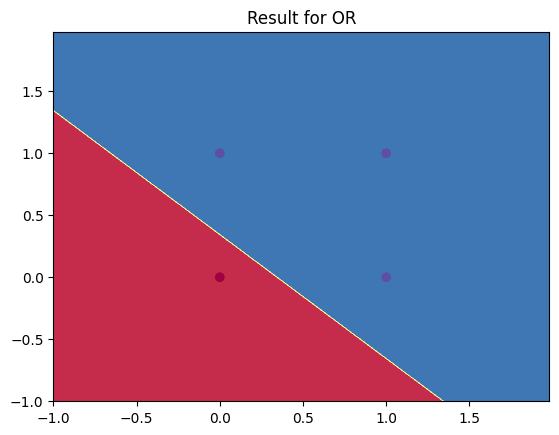

Truth Table
   input1  input2  actual  predicted
0       0       0       0          0
1       0       1       1          1
2       1       0       1          1
3       1       1       1          1


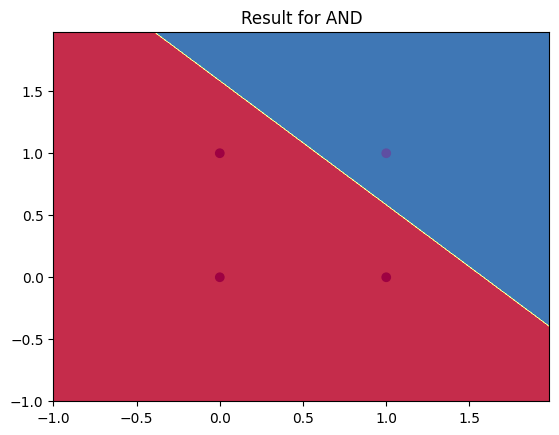

Truth Table
   input1  input2  actual  predicted
0       0       0       0          0
1       0       1       0          0
2       1       0       0          0
3       1       1       1          1


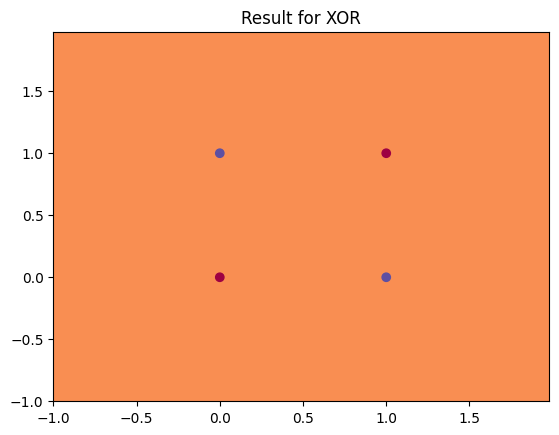

Truth Table
   input1  input2  actual  predicted
0       0       0       0          0
1       0       1       1          0
2       1       0       1          0
3       1       1       0          0


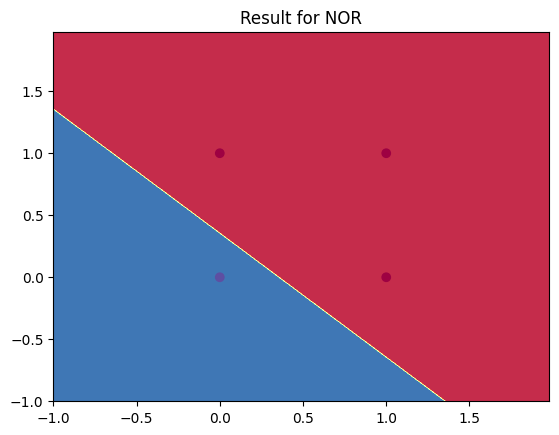

Truth Table
   input1  input2  actual  predicted
0       0       0       1          1
1       0       1       0          0
2       1       0       0          0
3       1       1       0          0


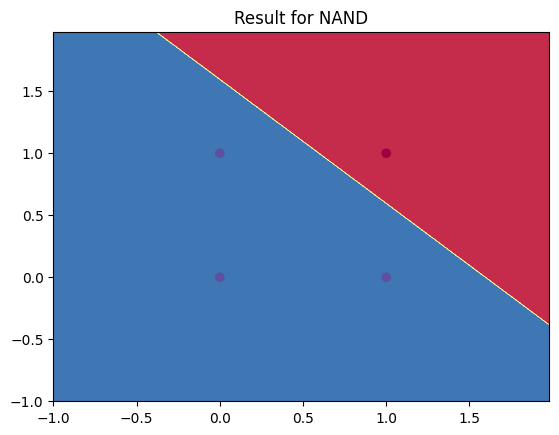

Truth Table
   input1  input2  actual  predicted
0       0       0       1          1
1       0       1       1          1
2       1       0       1          1
3       1       1       0          0


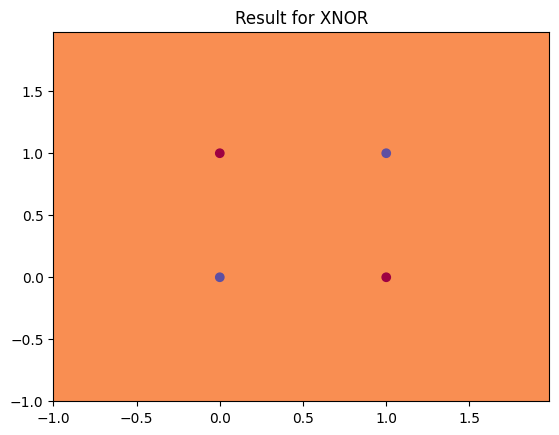

Truth Table
   input1  input2  actual  predicted
0       0       0       1          0
1       0       1       0          0
2       1       0       0          0
3       1       1       1          0


In [299]:
np.random.seed(42)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
GATES = {
    "OR": [0, 1, 1, 1],
    "AND": [0, 0, 0, 1],
    "XOR": [0, 1, 1, 0],
    "NOR": [1, 0, 0, 0],
    "NAND": [1, 1, 1, 0],
    "XNOR": [1, 0, 0, 1],
}


for gate in GATES:
   y = np.array([GATES[gate]]).T
   result = neural_network(X, y, learning_rate=0.1, activation_function=sigmoid)
   visualize_results(X, y, result, title=f"Result for {gate}")
   print(f'Truth Table')
   print(get_df(X, GATES[gate], result['output']))



In [300]:
def visualize_results(X, y, perceptron, title):
   h = .02
   x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

   Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape)

   plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
   plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.Spectral)
   plt.title(title)
   plt.show()

In [301]:
class Perceptron:
    def __init__(self, input_shape, learning_rate, activation_function):
        self.W = np.zeros((input_shape, 1))  # Initialize weights with random values
        self.b = np.zeros((1, ))
        self.learning_rate = learning_rate
        self.activation_function = activation_function
        
    def relu(self, x):
        return np.maximum(0, x)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def train(self, X, y, epochs):
        for _ in range(epochs):
            output = self.activation_function(X @ self.W + self.b)
            error = (y - output)
            delta = error * (output * (1 - output))
            self.W += self.learning_rate * X.T @ delta
            self.b += self.learning_rate * np.sum(delta, axis=0)
    
    def predict(self, X):
        return np.round(self.activation_function(X @ self.W + self.b))
    

In [302]:
np.random.seed(42)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
GATES = {
    "OR": [0, 1, 1, 1],
    "AND": [0, 0, 0, 1],
    "XOR": [0, 1, 1, 0],
    "NOR": [1, 0, 0, 0],
    "NAND": [1, 1, 1, 0],
    "XNOR": [1, 0, 0, 1],
}

for gate in GATES:
    perceptron = Perceptron(input_shape=2, learning_rate=0.1, activation_function=sigmoid)
    y = np.array([GATES[gate]]).T
    perceptron.train(X, y, epochs=500)
    visualize_results(X, y, perceptron, f"Results for {gate}")
    print(f'Truth Table')
    print(get_df(X, GATES[gate], perceptron.predict(X).flatten()))


TypeError: Cannot interpret '1' as a data type